### 네이버 뉴스

In [30]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.6/7.6 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 957.9 kB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import requests
from bs4 import BeautifulSoup
import pyautogui

In [9]:
search =pyautogui.prompt("검색어를 입력하세요>>>")
lastPage = pyautogui.prompt("몇페이지까지 검색할까요?")
pageNum = 1
for i in range(pageNum,int(lastPage)* 10,10):
    print(pageNum,'페이지')
    response = requests.get("https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query=" + search + "&start=" + str(i))
    html = response.text
    soup = BeautifulSoup(html , 'html.parser')
    soup.handle_data
    links = soup.select(".news_tit")

    for link in links:
        print(link.text)
        print(link.attrs['href'])
    pageNum+=1




TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

### 주식정보 크롤링

In [24]:
import requests
from bs4 import BeautifulSoup

url = "https://finance.naver.com/item/main.naver?code=005930"
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html,'html.parser')
price = soup.select_one(".no_today").text
price.replace("\n"," ")

'  63,900 63,900  '

In [31]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [38]:
samsung = fdr.DataReader('005930','2022-06-01','2023-03-31')

Text(0, 0.5, 'Price')

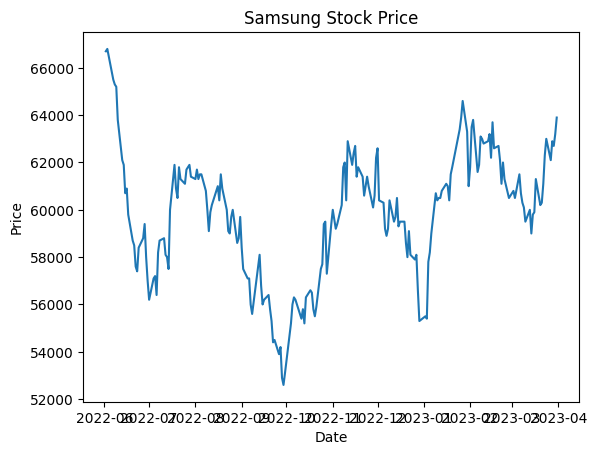

In [39]:
plt.plot(samsung['Close'])
plt.title("Samsung Stock Price")
plt.xlabel('Date')
plt.ylabel('Price')